# Литература:
    https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

# Парсинг данных


import requests
import json
url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY_ADJUSTED","symbol":"SPY","outputsize":"full","datatype":"json"}

headers = {
    'x-rapidapi-host': "alpha-vantage.p.rapidapi.com",
    'x-rapidapi-key': "7685be81fbmshe1096440c44d93ap1d4491jsn8ba57bf52657"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

#print(response.text)

data = json.loads(response.text)

a = data["Time Series (Daily)"].get("2022-03-07")
a.get("4. close")

x = list(data['Time Series (Daily)'])
x[1]
data["Time Series (Daily)"].get(x[1])

xx = list(data["Time Series (Daily)"])
yy = []
for i in xx:
    cmd = data["Time Series (Daily)"].get(i)
    price = cmd.get("4. close")    
    yy.append(float(price))
    

x = []
y = []
for i in xx:
    x.append(i)
for i in yy:
    y.append(int(i))


# Программа 

In [1]:
import math
import numpy as np
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import read_csv
import csv
from pandas import DataFrame
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

<ipython-input-1-926dac5e7d23>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
series = pd.read_csv("price.csv")
a = series.head(1000)

In [3]:
df = series.drop(['2022-03-11'], axis = 1)

In [4]:
df['420'].mean()

178.80145751866334

In [6]:
rolling_mean = series.rolling(window = 12).mean()#скользящая средняя
rolling_std = series.rolling(window = 12).std()#Среднеквадратическое отклонение(standard deviation)

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(df)
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend(loc = 'best')



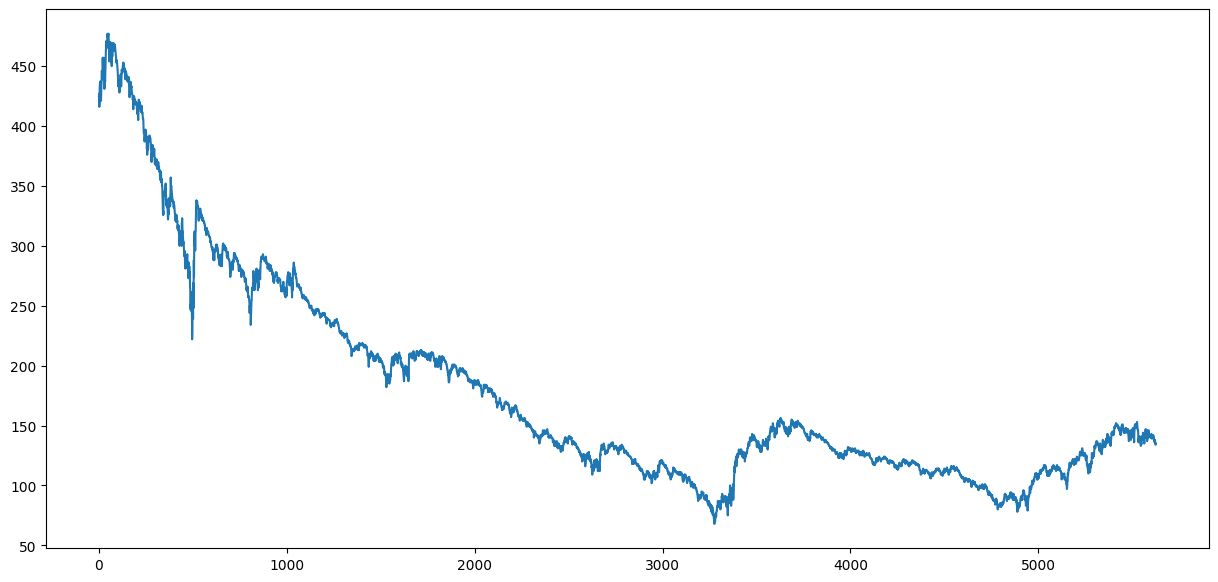

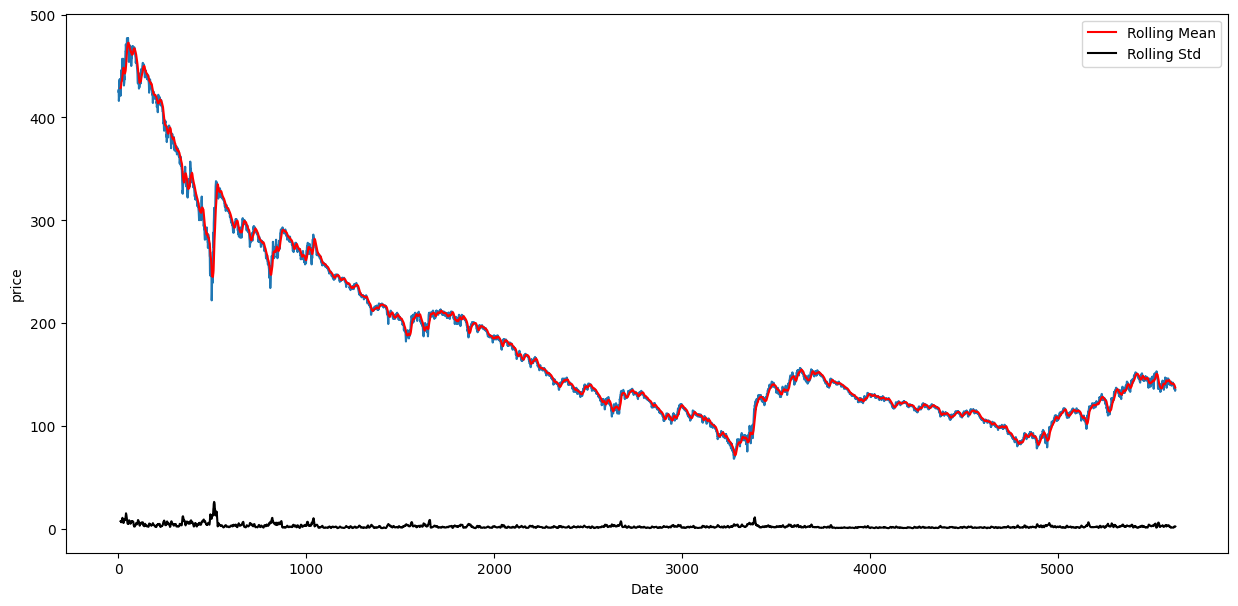

In [8]:
plt.show()

In [9]:
#Для аримы важно, чтобы данные были стационарными, проверим это
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['420'])

In [10]:
test_result

(-3.8136468275056012,
 0.0027707359238101636,
 27,
 5598,
 {'1%': -3.4315186854422413,
  '5%': -2.8620564447336996,
  '10%': -2.5670449020697306},
 24408.453725381652)

In [11]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print(" Data is stationary")
    else:
        print("Data is non-stationary ")

adfuller_test(df['420'])

ADF Test Statistic : -3.8136468275056012
p-value : 0.0027707359238101636
#Lags Used : 27
Number of Observations : 5598
 Data is stationary


In [19]:
#если non-stationary

In [20]:
df['Sales First Difference'] = df['420'] - df['420'].shift(1)
df['Seasonal First Difference']=df['420']-df['420'].shift(12)
df.head()
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -12.839977592273206
p-value : 5.6340362510384936e-24
#Lags Used : 33
Number of Observations : 5580
 Data is stationary


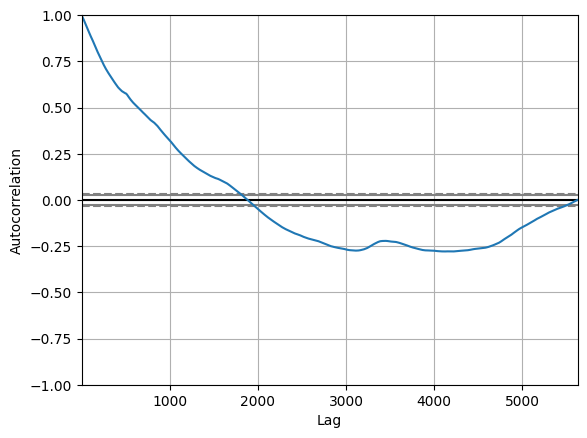

In [21]:
#проведем авто-корреляцию данных (хотя нафига?)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['420'])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

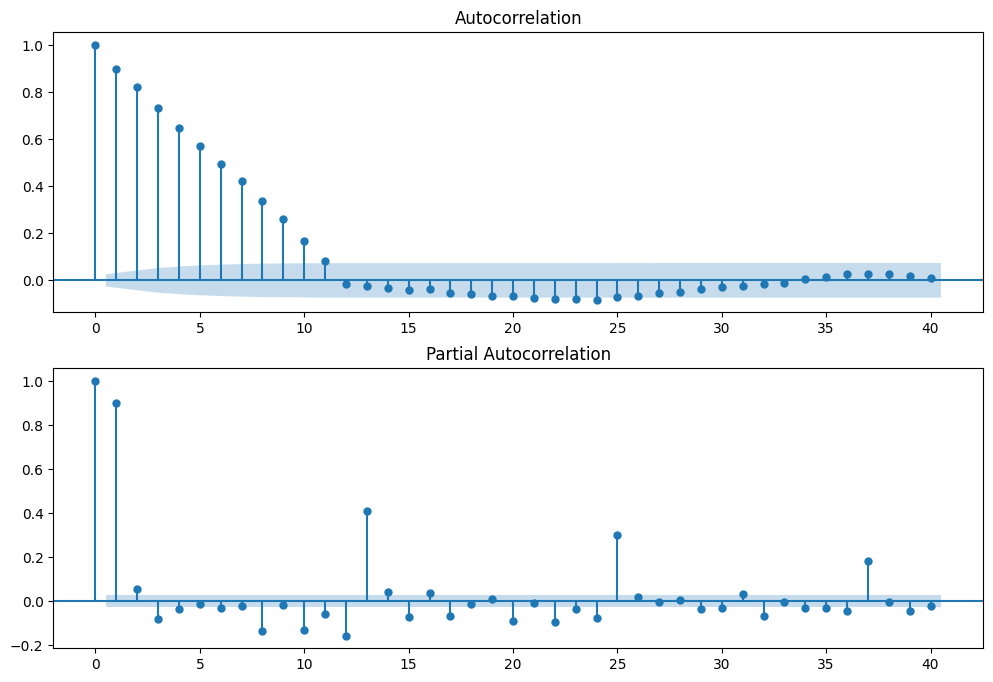

In [23]:
plt.show()

In [24]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['420'],order=(0,0,0))
model_fit=model.fit()
model_fit.summary()

/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    420   No. Observations:                 5626
Model:                     ARMA(0, 0)   Log Likelihood              -33191.983
Method:                           css   S.D. of innovations             88.306
Date:                Thu, 17 Mar 2022   AIC                          66387.966
Time:                        21:46:10   BIC                          66401.236
Sample:                             0   HQIC                         66392.589
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.8015      1.177    151.873      0.000     176.494     181.109
==============================================================================
"""

In [12]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['420'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=31,end=41,dynamic=True)
df['forecast2']=results.predict(start=58,end=60,dynamic=True)
df[['420','forecast','forecast2']].head(100).plot(figsize=(12,6))

<AxesSubplot:>

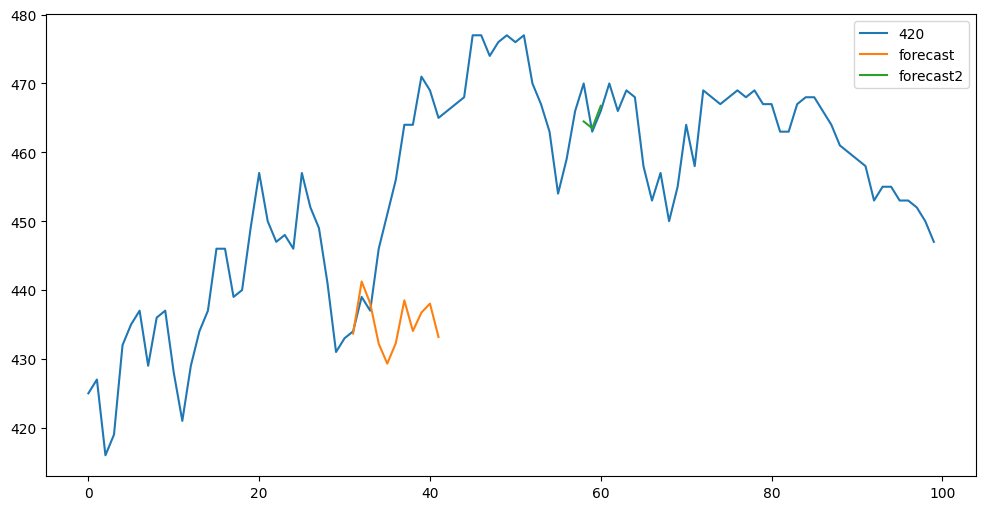

In [13]:
plt.show()

In [14]:
DFArray = []
for i in range(1867):
    array = []
    for j in range(3):
        array.append(df['420'][i+j])
    DFArray.append(array)
ForecastArray = []
for i in range(1867):
    array = []
    #model=sm.tsa.statespace.SARIMAX(df['420'].head(i * 10),order=(1, 1, 1),seasonal_order=(1,1,1,12))
    df['forecast'] = results.predict(start = i, end = i+5, dynamic = True)
    for j in range(3):
        array.append(df['forecast'][i + j])
    ForecastArray.append(array)

In [53]:
"""
ForecastArray = []
for i in range(1120):
    array = []
    df['forecast'] = results.predict(start = i, end = i+10, dynamic = True)
    for j in range(5):
        array.append(df['forecast'][i + j])
    ForecastArray.append(array)
    """

"\nForecastArray = []\nfor i in range(1120):\n    array = []\n    df['forecast'] = results.predict(start = i, end = i+10, dynamic = True)\n    for j in range(5):\n        array.append(df['forecast'][i + j])\n    ForecastArray.append(array)\n    "

In [9]:
def DifferenceArrayAndComparison():#ненужно
    DifferenceArray = []
    for i in range(len(ForecastArray)):
        array = []
        for j in range(len(ForecastArray[i])):
            array.append(ForecastArray[i][j] - DFArray[i][j])
        DifferenceArray.append(array)
    ExpectationArray = []
    for i in range(len(DifferenceArray)):
        for j in DifferenceArray[i]:
            if j < 0.05:
                ExpectationArray.append(1)
            else:
                ExpectationArray.append(0)
    #ExpectationArray

In [10]:
def PiefromOneAndTwo():#ненужно
    one = 0
    for i in ExpectationArray:
        one +=i
    zero = 5600 - one
    y = np.array([one, zero])
    labels = ["one", "zero"]
    plt.pie(y, labels = labels)
    plt.show()

In [17]:
aaa= np.array(DFArray)

In [18]:
aaa[480]

array([277, 283, 275])

In [20]:
#t_test:
from scipy import stats
rng = np.random.default_rng()
rvs = stats.norm.rvs(loc=5, scale=10, size=(50, 2), random_state=rng)

In [21]:
result = stats.ttest_1samp(a = ForecastArray[9], popmean = aaa[9].mean())

In [22]:
result.pvalue

2.2964368874693775e-11

In [23]:
cou_t = []
pval_e = []
for i in range(1867):
    result = stats.ttest_ind(a = DFArray[i], b = ForecastArray[i], equal_var = False)
    cou_t.append(result.count)
    pval_e.append(result.pvalue)
    

In [24]:
Hipoteses = []
for i in pval_e:
    if i <= 0.05:
        Hipoteses.append(1)
        Hipoteses.append(1)
        Hipoteses.append(1)
    else:
        Hipoteses.append(0)
        Hipoteses.append(0)
        Hipoteses.append(0)

In [25]:
for i in range(1887):
    if Hipoteses[i] == 1:
        Hipoteses[i] = df['420'][i]
    else:
        Hipoteses[i] = np.NaN

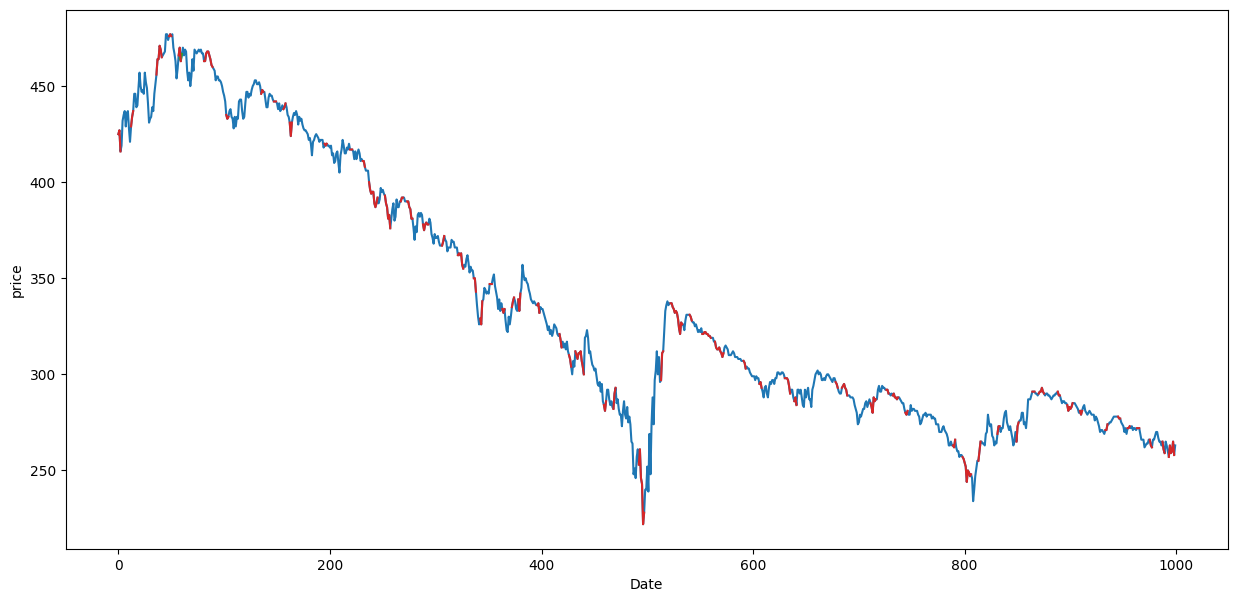

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(df[:1000])
plt.plot(Hipoteses[:1000])
plt.xlabel('Date')
plt.ylabel('price')
plt.show()